<a href="https://colab.research.google.com/github/rocioromera911/Portafolio_RR/blob/main/curvadesaprenzije.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [ ]:
ml= LinearRegression()

In [ ]:

df=pd.read_excel("/content/drive/MyDrive/ies 2023/2023/2s/ML2/TP/ENB2012_data.xlsx")

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:

x=df.drop(["Y1",'Y2'],axis=1)
y = df[['Y1', 'Y2']]

In [ ]:

poly = PolynomialFeatures(3)
x_po = pd.DataFrame(poly.fit_transform(x))
x_po

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,1.0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,0.9604,...,8.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
1,1.0,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,0.9604,...,27.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
2,1.0,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,0.9604,...,64.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
3,1.0,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,0.9604,...,125.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
4,1.0,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,0.8100,...,8.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,0.4096,...,125.0,10.0,125.0,0.80,10.0,125.0,0.064,0.8,10.0,125.0
764,1.0,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,0.3844,...,8.0,1.6,20.0,0.32,4.0,50.0,0.064,0.8,10.0,125.0
765,1.0,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,0.3844,...,27.0,3.6,45.0,0.48,6.0,75.0,0.064,0.8,10.0,125.0
766,1.0,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,0.3844,...,64.0,6.4,80.0,0.64,8.0,100.0,0.064,0.8,10.0,125.0


In [ ]:
#Concateno las Y
df=pd.concat([x_po,y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,Y1,Y2
0,1.0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,0.9604,...,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,15.55,21.33
1,1.0,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,0.9604,...,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,15.55,21.33
2,1.0,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,0.9604,...,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,15.55,21.33
3,1.0,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,0.9604,...,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,15.55,21.33
4,1.0,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,0.8100,...,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,0.4096,...,125.0,0.80,10.0,125.0,0.064,0.8,10.0,125.0,17.88,21.40
764,1.0,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,0.3844,...,20.0,0.32,4.0,50.0,0.064,0.8,10.0,125.0,16.54,16.88
765,1.0,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,0.3844,...,45.0,0.48,6.0,75.0,0.064,0.8,10.0,125.0,16.44,17.11
766,1.0,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,0.3844,...,80.0,0.64,8.0,100.0,0.064,0.8,10.0,125.0,16.48,16.61


In [ ]:

df_2=df.drop(["Y1"],axis=1)
df_1=df.drop(["Y2"],axis=1)

In [ ]:
#En cada DF creo su x e y para entrenarlos
x_1=df_1.drop(["Y1"],axis=1)
y_1=df_1["Y1"]

In [ ]:
x_2=df_2.drop(["Y2"],axis=1)
y_2=df_2["Y2"]

In [ ]:
#Separo en train y test
x1_train, x1_test, y1_train, y1_test = train_test_split(x_1, y_1, test_size=0.30, random_state=123)
x2_train, x2_test, y2_train, y2_test = train_test_split(x_2, y_2, test_size=0.30, random_state=123)

In [ ]:
#Aplico regresion lineal
rl=LinearRegression()
modelo=rl.fit(x1_train, y1_train)
y1_pred=modelo.predict(x1_test)
ensemble_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
ensemble_r2 = r2_score(y1_test, y1_pred)
#Vemos el RMSE y R²
print("RMSE del ensemble:", ensemble_rmse)
print("R² del ensemble:", ensemble_r2)

RMSE del ensemble: 0.4664955937578208
R² del ensemble: 0.9977165451946379


In [ ]:
#Hacemos learning curve y cross validation
tamanos_train=np.linspace(0.05, 1.0, 20)

train_sizes_abs, train_scores, test_scores = learning_curve(
    modelo,
    x1,
    y1,
    train_sizes=tamanos_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    shuffle=True)

In [ ]:
train_sizes_abs

array([ 30,  61,  92, 122, 153, 184, 214, 245, 276, 306, 337, 368, 399,
       429, 460, 491, 521, 552, 583, 614])

In [ ]:
#Paso a positivo a los valores
train_scores * -1

array([[1.12623181e-12, 3.85452874e-12, 9.24769804e-13, 9.21623620e-13,
        4.75575857e-12],
       [3.33231050e-10, 2.35348271e-10, 1.61127176e-10, 1.93119807e-10,
        5.77372170e-12],
       [6.02251656e-02, 1.07288858e-01, 6.66697500e-02, 9.55390787e-02,
        4.08490517e-02],
       [3.33853111e-01, 1.99734509e-01, 1.74097933e-01, 2.24780375e-01,
        1.82514325e-01],
       [4.04494515e-01, 2.60290702e-01, 2.79023389e-01, 2.59360904e-01,
        2.51790493e-01],
       [4.18894918e-01, 3.39669021e-01, 3.87815495e-01, 6.00501819e-01,
        2.80196909e-01],
       [4.54677045e-01, 3.42801926e-01, 3.82118364e-01, 3.66039688e-01,
        3.59952697e-01],
       [4.23990118e-01, 3.68855990e-01, 3.38563032e-01, 4.31425434e-01,
        5.14879989e-01],
       [5.66372923e-01, 3.63590315e-01, 3.61874946e-01, 4.26040947e-01,
        6.02563257e-01],
       [5.83761982e-01, 3.74254068e-01, 3.76483871e-01, 5.50825163e-01,
        3.95508829e-01],
       [4.07669164e-01, 3.8813

In [ ]:
#Sacamos el promedio de los resultados
mean_train_scores = np.mean(train_scores, axis=1)
mean_train_scores

array([-2.31658251e-12, -1.85720005e-10, -7.41143808e-02, -2.22996050e-01,
       -2.90992000e-01, -4.05415632e-01, -3.81117944e-01, -4.15542913e-01,
       -4.64088478e-01, -4.56166782e-01, -4.50855249e-01, -4.34905187e-01,
       -4.34079054e-01, -4.39899005e-01, -4.30452512e-01, -4.60999506e-01,
       -4.95356474e-01, -4.82838700e-01, -4.69148580e-01, -4.51656323e-01])

In [ ]:
#Los paso a positivos
test_scores * -1

array([[  7.42334018,   5.74303729,  17.33858062,   9.76222673,
         18.7872065 ],
       [  7.96482009,   6.95125582,  22.94784559,   4.63185836,
          3.88051148],
       [ 26.09540532,   5.0132499 ,  73.74178807, 294.21364529,
          2.90724857],
       [  4.97826605,   1.47446263,   1.32206808,   1.72519145,
          1.74457179],
       [  4.80915531,   1.64960305,   0.67892825,   0.88273714,
          1.45822261],
       [  6.05215669,   1.68503602,   1.18147918,   1.60569564,
          0.91149213],
       [  6.355385  ,   0.77771665,   0.77072157,   1.09936352,
          1.11219913],
       [  6.78111294,   0.79184916,   0.67225226,   1.03980091,
          1.41436617],
       [  4.60475064,   0.75260235,   0.63726403,   0.99345004,
          1.19902956],
       [  7.67193397,   0.69772973,   0.57179737,   1.30015452,
          1.69745566],
       [  6.70009678,   0.88372866,   0.64869776,   1.09281728,
          1.4389981 ],
       [  6.04187932,   1.03549382,   0.509

In [ ]:
#Saco el promedio de los resultados
mean_test_scores = np.mean(test_scores, axis=1)
mean_test_scores

array([-11.81087826,  -9.27525827, -80.39426743,  -2.248912  ,
        -1.89572927,  -2.28717193,  -2.02307717,  -2.13987629,
        -1.63741933,  -2.38781425,  -2.15286772,  -2.00971916,
        -1.78727217,  -1.88121747,  -1.68519957,  -1.63969989,
        -1.90136732,  -1.89634061,  -1.85499502,  -1.8420568 ])

In [ ]:
#Preparo todo para posterior graficar
df_learning_curves1=pd.DataFrame()
df_learning_curves1['observaciones'] = train_sizes_abs
df_learning_curves1['train_RMSE'] = mean_train_scores*-1
df_learning_curves1['test_RMSE'] = mean_test_scores*-1


df_learning_curves1

,observaciones,train_RMSE,test_RMSE
0,30,2.316583e-12,11.810878
1,61,1.857200e-10,9.275258
2,92,7.411438e-02,80.394267
3,122,2.229961e-01,2.248912
4,153,2.909920e-01,1.895729
5,184,4.054156e-01,2.287172
6,214,3.811179e-01,2.023077
7,245,4.155429e-01,2.139876
8,276,4.640885e-01,1.637419
9,306,4.561668e-01,2.387814


''

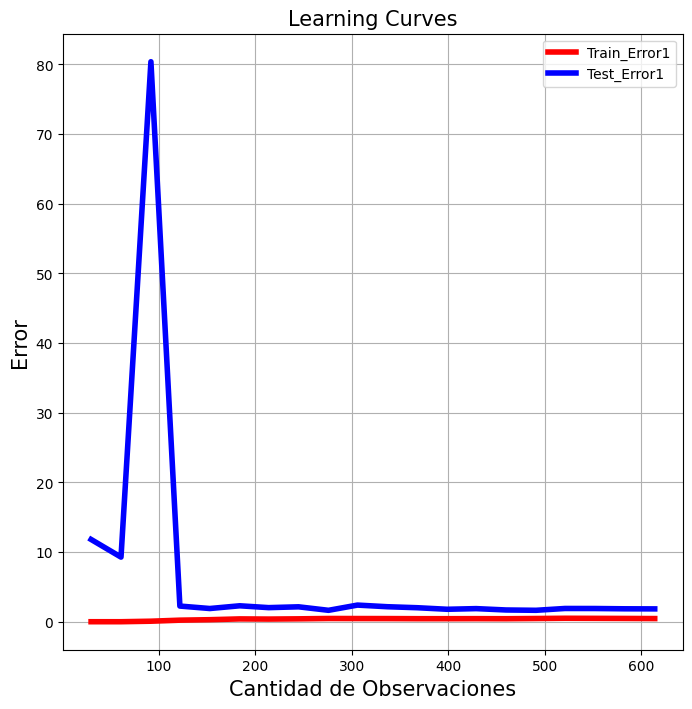

In [ ]:
#Grafico mi learning curves
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.title("Learning Curves", size=15)

axes.plot(df_learning_curves1['observaciones'],df_learning_curves1['train_RMSE'], "red",  linewidth=4,label="Train_Error1")
axes.plot(df_learning_curves1['observaciones'],df_learning_curves1['test_RMSE'], "blue",  linewidth=4, label="Test_Error1")

axes.grid(True)
axes.legend(loc="upper right",fontsize=10)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)
;

Lo que podemos observar es que al comienzo hay una distancia relativamente grande y despues crece a niveles muy altos. Posteriormente se estabiliza en valores mas bajos.

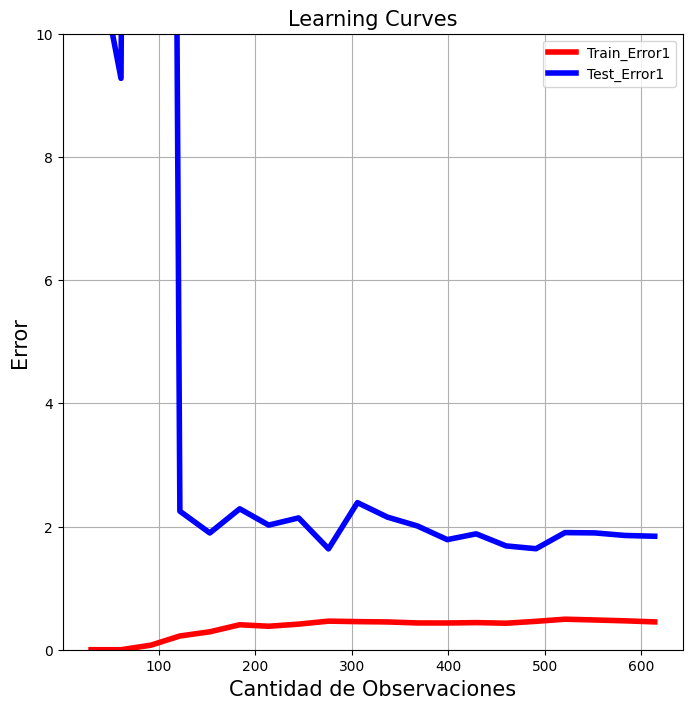

In [ ]:
axes.set_ylim(0, 10);
fig

Haciendo Zoom al grafico anterior podemos observar que el gap quedo bajo y quedo un grado de error bajo asi que quedo genial

In [ ]:
#Analizo el df para ver si esta bien el error que me dio
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,768.0,1.000000,0.000000,1.00,1.0000,1.000000,1.000000,1.000
1,768.0,0.764167,0.105777,0.62,0.6825,0.750000,0.830000,0.980
2,768.0,671.708333,88.086116,514.50,606.3750,673.750000,741.125000,808.500
3,768.0,318.500000,43.626481,245.00,294.0000,318.500000,343.000000,416.500
4,768.0,176.604167,45.165950,110.25,140.8750,183.750000,220.500000,220.500
...,...,...,...,...,...,...,...,...
161,768.0,0.025195,0.026884,0.00,0.0010,0.015625,0.064000,0.064
162,768.0,0.217969,0.233092,0.00,0.0375,0.142500,0.314375,0.800
163,768.0,2.578125,2.754859,0.00,0.4000,1.600000,3.700000,10.000
164,768.0,42.187500,45.491449,0.00,6.2500,27.000000,64.000000,125.000


In [ ]:
#Entreno el segundo df
modelo2=rl.fit(x2_train, y2_train)
y2_pred=modelo.predict(x2_test)
ensemble_rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
ensemble_r22 = r2_score(y2_test, y2_pred)
print("RMSE del ensemble:", ensemble_rmse2)
print("R² del ensemble:", ensemble_r22)

RMSE del ensemble: 1.5619774755215543
R² del ensemble: 0.9714298297243289


In [ ]:
#Hacemos learning curve y cross validation
tamanos_train=np.linspace(0.05, 1.0, 20)

train_sizes_abs, train_scores, test_scores = learning_curve(
    modelo2,
    x2,
    y2,
    train_sizes=tamanos_train,
    cv=5,
    scoring='neg_root_mean_squared_error',
    shuffle=True)

In [ ]:
train_sizes_abs

array([ 30,  61,  92, 122, 153, 184, 214, 245, 276, 306, 337, 368, 399,
       429, 460, 491, 521, 552, 583, 614])

In [ ]:
#Paso a positivos los valores
train_scores * -1

array([[1.90030387e-12, 1.84278272e-12, 1.97339363e-12, 4.00823623e-12,
        1.48373676e-12],
       [3.44363856e-10, 2.68091060e-10, 2.44937255e-10, 1.13753880e-10,
        1.50294031e-10],
       [3.57071892e-01, 1.10819486e-01, 3.70259022e-01, 2.65390338e-01,
        1.56047982e-01],
       [6.81411344e-01, 5.35228399e-01, 7.81700162e-01, 4.81168142e-01,
        5.66059768e-01],
       [8.46937860e-01, 9.78245572e-01, 1.00348363e+00, 8.44453009e-01,
        7.99489648e-01],
       [3.81533894e+00, 3.89296713e+00, 1.39878312e+00, 9.82078753e-01,
        9.93505248e-01],
       [5.43172893e+00, 4.76727729e+00, 1.30339601e+00, 1.14865013e+00,
        1.33587491e+00],
       [3.82176878e+00, 5.15916686e+00, 1.27695899e+00, 1.17060352e+00,
        1.17083275e+00],
       [5.71748986e+00, 3.37396068e+00, 1.21544102e+00, 1.20541026e+00,
        1.12797130e+00],
       [8.84129949e+00, 5.94733371e+00, 1.29669823e+00, 1.27624653e+00,
        1.23059727e+00],
       [7.48645578e+00, 3.0989

In [ ]:
#Saco el promedio de los resultados
mean_train_scores = np.mean(train_scores, axis=1)
mean_train_scores

array([-2.24169064e-12, -2.24288016e-10, -2.51917744e-01, -6.09113563e-01,
       -8.94521945e-01, -2.21653464e+00, -2.79738546e+00, -2.51986618e+00,
       -2.52805462e+00, -3.71843504e+00, -2.89641747e+00, -1.82087271e+00,
       -1.36335336e+00, -1.37239034e+00, -1.37866371e+00, -1.80504140e+00,
       -1.38376274e+00, -1.38627263e+00, -2.40347841e+00, -1.40294648e+00])

In [ ]:
#Paso a positivos los valores
test_scores * -1

array([[ 31.56119549,   7.59847083,  14.86371214,  22.41617414,
         20.53315115],
       [  7.28711856,  14.02535682,  11.49230791,  13.73458723,
         11.82853543],
       [ 35.04000187, 699.35586985,  24.87829336,  30.1153227 ,
         15.34675446],
       [ 18.02853841,  10.38901765,   4.19442862,  15.90049701,
          9.2691581 ],
       [ 10.3558998 ,   5.21586797,   2.44025821,   7.29682099,
          3.44333653],
       [ 26.89802457,   6.95311852,   2.11012037,   5.31110623,
          2.61348622],
       [ 23.31317586,   6.97706421,   1.8431971 ,   2.60737254,
          5.25669008],
       [ 10.89185016,   7.92659264,   1.70832646,   2.79395352,
          3.71292595],
       [ 28.15048403,   5.31599481,   1.70388705,   2.70495976,
          2.77487461],
       [ 33.84379378,   7.80442317,   1.62217687,   2.62618019,
          2.47039373],
       [ 32.69510043,   3.77921648,   1.55470341,   2.47094949,
          2.45790994],
       [ 16.44877616,   1.68618778,   1.531

In [ ]:
#Saco el promedio de los resultados
mean_test_scores = np.mean(test_scores, axis=1)
mean_test_scores

array([ -19.39454075,  -11.67358119, -160.94724845,  -11.55632796,
         -5.7504367 ,   -8.77717118,   -7.99949996,   -5.40672975,
         -8.13004005,   -9.67339355,   -8.59157595,   -4.81202819,
         -2.1435478 ,   -2.19037888,   -1.96144195,   -4.7089671 ,
         -2.07990246,   -2.0181667 ,   -8.14274532,   -1.93849285])

In [ ]:
#Preparo todo para graficar
df_learning_curves2=pd.DataFrame()
df_learning_curves2['observaciones'] = train_sizes_abs
df_learning_curves2['train_RMSE'] = mean_train_scores*-1
df_learning_curves2['test_RMSE'] = mean_test_scores*-1


df_learning_curves2

,observaciones,train_RMSE,test_RMSE
0,30,2.241691e-12,19.394541
1,61,2.242880e-10,11.673581
2,92,2.519177e-01,160.947248
3,122,6.091136e-01,11.556328
4,153,8.945219e-01,5.750437
5,184,2.216535e+00,8.777171
6,214,2.797385e+00,7.999500
7,245,2.519866e+00,5.406730
8,276,2.528055e+00,8.130040
9,306,3.718435e+00,9.673394


''

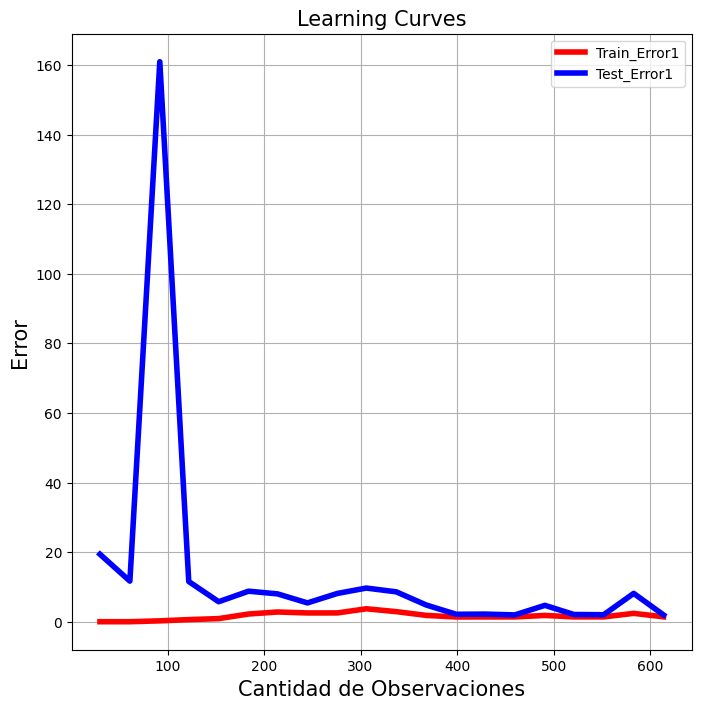

In [ ]:
#Hacemos el grafico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

plt.title("Learning Curves", size=15)

axes.plot(df_learning_curves2['observaciones'],df_learning_curves2['train_RMSE'], "red",  linewidth=4,label="Train_Error1")
axes.plot(df_learning_curves2['observaciones'],df_learning_curves2['test_RMSE'], "blue",  linewidth=4, label="Test_Error1")

axes.grid(True)
axes.legend(loc="upper right",fontsize=10)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)
;

Podemos ver que a comparacion del otro grafico tardo un poco menos en estabilizarse en un bajo grado de error y con poco gap pero ahora lo vamos a ver mejor cuando le hagamos zoom

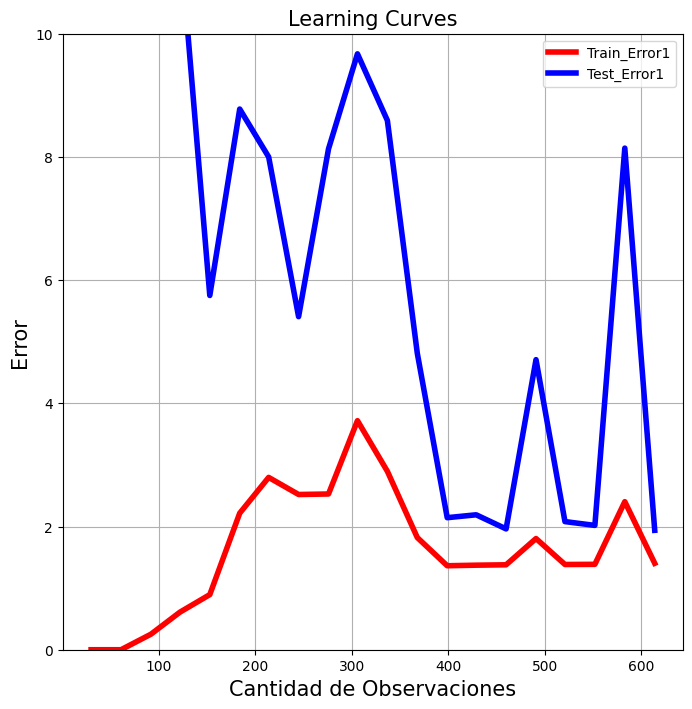

In [ ]:
axes.set_ylim(0, 10);
fig

Podemos ver que el modelo se adapta bastante bien. Es bajo el grado de error y el gap

# En Conclusion
Llegamos a la conclusion de que nuestro modelo funciona bastante bien ya que no se logra apreciar ni underfitting ni overfitting. Tambien nuestro grado de error y gap son bajos por lo que demuestra que nuestro modelo no delira y que se adapta bien a lo que queremos proyectar